<a href="https://colab.research.google.com/github/divyam1464/GFG_GenerativeAI_and_ChatGPT/blob/main/GFG_Generative_AI_%26_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# training and testing datasets and then loading the image datasets from the mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train.shape

(60000, 10)

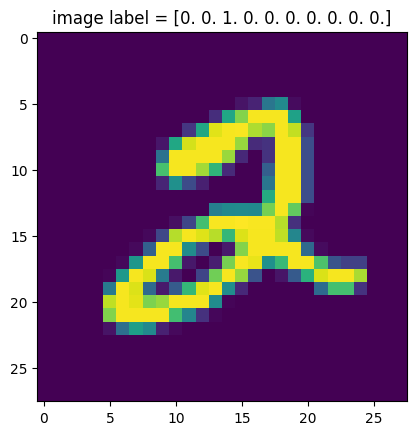

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [ ]:
import numpy as np
np.unique(y_train)
# means this has 10 unique values so we also need 10 neurons in the output layer.

array([0., 1.])

In [ ]:
# now start with the modelling part and to do that first we need to get the datasets and import the libraries for the datasets
from tensorflow.keras.layers import Dense, Flatten
# then we will be getting the model
from tensorflow.keras.models import Sequential
# these are the libraries which we need to create the deep learning model

In [ ]:
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
# now we will start with the modelling part
model = Sequential([

   Flatten(input_shape = (28,28)), # we are trying to convert this (2D matrix -> 1D simple line matrix) , basically flattening the layer
   # so as input layer it has 28*28 = 784
   # means input layer consists of -> 784 neurons
   # flatten layer -> input layer (in this particular case)

   Dense(5, activation = 'relu'), # Dense layer is used when we are applying a feed-forward neural network
   #  5 -> how many neurons do you want
   # Dense Layer -> Hidden Layer
   # Hidden layer = 5 neurons
   # activation function allows you for the non - linearity in the data and in hidden layers by default we consider (relu) function
   # b,coz computation can go to different values, you can not categorize them

   Dense(10, activation = 'softmax') # Output Layer
   # consists of 10 neurons
   # we have to predict the 10 different categories that is why we are having the 10 neurons in the output layer
   # softmax b'coz we can use sigmoid if it is a binary classfication , but b'coz it is multi-level classification that's why we use it
])
# to create the different types of architechtures i.e., one to one, many to many , etc.
# and other we require to use functional api's and this model above is sequential model means all the input,
# hidden and output layer is in same line as studied.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# at the end i will be looking for that how much our model is accurate
# loss is the total loss of each iteration ( like in back-propagation )
# how you will be optimizing the back propagation and idetifying the loss and how you are gonna reduce it
# optimizer means that what is the loss for the single entry and how you are optimizing the values , weights
# adam is the more optimized approach for the gradient descent

In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 2)
# model is now completely trained and now fit this model
# first 2 parameters are just two values on which data is gonna train itslef
# epochs refer to that how many times you are gonna do the iteration , for whole of the dataset how many iteration you are gonna perform
# batch_size refers to in a single training phase i will be picking 32 pieces at one go,
    # and then i will be training them and readjust the values and again train them and again
# verbose means how much information you want to show in the training phase

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7656 - loss: 0.7742
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8732 - loss: 0.4376
Epoch 3/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8861 - loss: 0.3899
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8935 - loss: 0.3694
Epoch 5/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8972 - loss: 0.3581


In [ ]:
# we need to evaluate the date on the testing date also
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8804 - loss: 0.4000


[0.3582537770271301, 0.894599974155426]

In [ ]:
# the model is now saved with the h5 extension and now it can be download and can be used for any of the web application, any kind of server deployement, etc.
model.save('mnist.h5')

In [ ]:
# these are all the importance given to all the different set of parameters
model.get_weights()

[array([[ 0.07079835,  0.02207638, -0.01927035, -0.02224389,  0.00056184],
        [-0.0306648 , -0.06078108,  0.07911481, -0.0081863 , -0.06907097],
        [ 0.07478118,  0.07955191, -0.00405858, -0.02962008, -0.06018357],
        ...,
        [ 0.0396301 ,  0.02133217, -0.01667131,  0.06683096, -0.0691255 ],
        [-0.04536603,  0.01970808,  0.04480332, -0.04810607,  0.08085415],
        [ 0.05864625, -0.0510711 ,  0.02511131,  0.02002107, -0.04813099]],
       dtype=float32),
 array([ 0.25064304, -0.36125883,  0.31284127, -0.02750477, -0.08953663],
       dtype=float32),
 array([[-0.6947013 ,  0.03870261, -0.2593954 , -0.3512644 ,  0.2872233 ,
         -0.86739886, -0.9937425 ,  0.81062955, -0.09132074,  0.6564914 ],
        [-0.34723333,  0.6484431 ,  0.9074973 , -0.06263521, -0.9517381 ,
         -0.5933293 ,  0.534152  , -0.34377193,  0.10958212, -1.0418526 ],
        [ 0.5052042 , -1.007971  , -0.25774923, -0.61031234,  0.69028443,
          0.45782262,  0.8210312 , -0.808359

In [ ]:
# these are the basic feed forwared neural network

# ***Complex Neural Networks***

In [37]:
from keras.models import Model
# we are just importing the model which helps us perform the complex architectures of the model and then to apply different kind of model itself or neurons
from keras.layers import Input, Flatten, Dense, concatenate

In [38]:
input_layer = Input(shape = (28,28))
flatten = Flatten(input_shape = (28,28))(input_layer)
hidden1 = Dense(128, activation = 'relu')(flatten)
hidden2 = Dense(256, activation = 'relu')(flatten)
hidden11 = Dense(64, activation = 'relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation = 'softmax')(merge)

In [39]:
# here we are trying to create a type of parallel architecture -> 1 input layer
#                                                                 2 parallel hidden layers
#                                                                 1 concatenation layer
#                                                                 1 output layer

                                                  #       -------------
                                                  #       |Input Layer|
                                                  #       -------------
                                                  #             |
                                                  #      ---------------------
                                                  #      |                   |
                                                  # --------------       --------------
                                                  # |Hidden Layer|       |Hidden Layer|
                                                  # --------------       --------------
                                                  #        |                    |
                                                  # ------------------          |
                                                  # |Hidden Layer 1.1|          |
                                                  # ------------------          |
                                                  #        |                    |
                                                  #        |                    |
                                                  #        |                    |
                                                  #   --------------------------------
                                                  #   |       Output Layer           |
                                                  #   --------------------------------

In [40]:
model = Model(inputs = input_layer, outputs = output_layer)

In [41]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 784)       │          0 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │    100,480 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      8,256 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │    200,960 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 320)       │          0 │ dense_20[0][0],   │
│ (Concatenate)       │                   │            │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 10)        │      3,210 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,906 (1.19 MB)

 Trainable params: 312,906 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

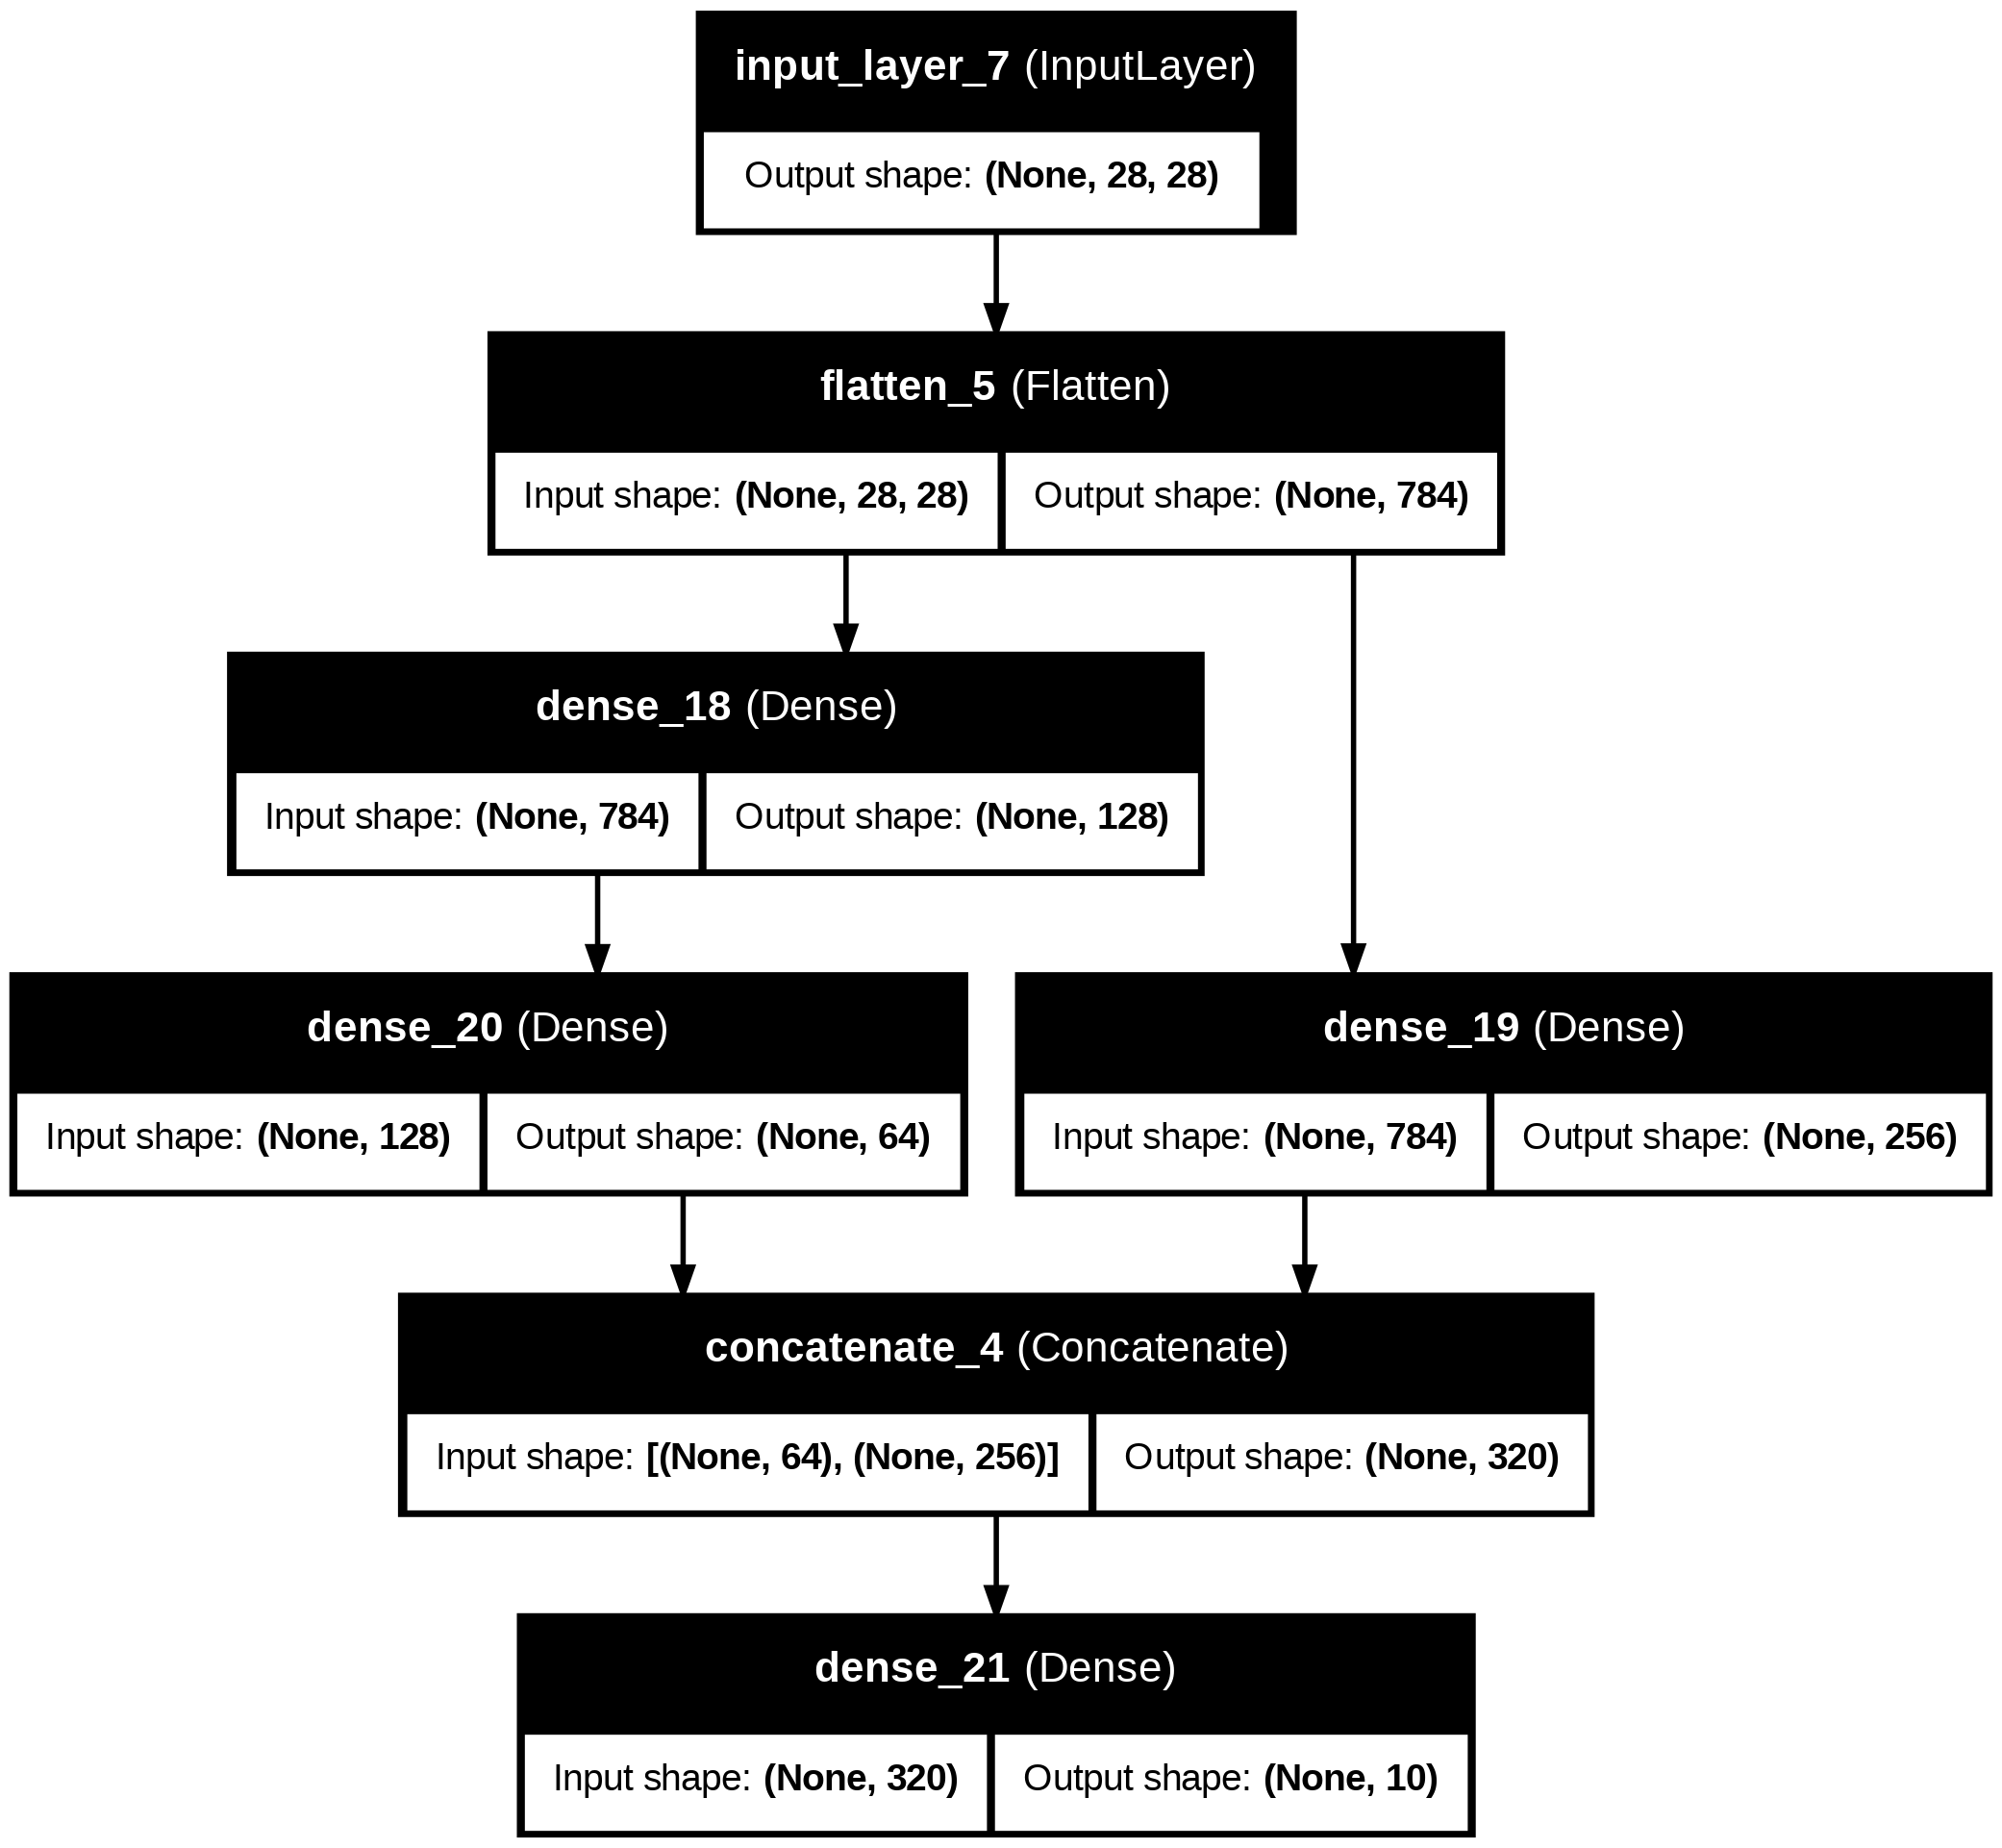

In [42]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)

In [43]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 12s - 7ms/step - accuracy: 0.9398 - loss: 0.2056
Epoch 2/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9745 - loss: 0.0835
Epoch 3/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9822 - loss: 0.0553
Epoch 4/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9875 - loss: 0.0396
Epoch 5/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9897 - loss: 0.0307


In [45]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.1008


[0.08900022506713867, 0.9764999747276306]